## Importing Data

In [604]:
data=pd.read_csv(r'C:\Users\Mike\Desktop\Trading Analytics.csv')

## Libraries

In [605]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing packages and enabling multi-line output

## Looking at Data Structure

In [606]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 52 columns):
ID.o                          411 non-null object
Price                         411 non-null float64
 Volume                       411 non-null int64
 TradeTime                    411 non-null object
 EventTime                    411 non-null int64
 Offer                        411 non-null float64
 Bid                          411 non-null float64
 Buyer                        410 non-null object
 Seller                       411 non-null object
 buyerID                      411 non-null int64
 sellerID                     411 non-null int64
 Realized Tot                 411 non-null float64
 R per Tr                     411 non-null float64
UnReal Q                      411 non-null int64
U per tr Q                    411 non-null int64
 Unreal Tot $                 411 non-null float64
User Volu                     411 non-null int64
User%ofTotalVolu              411 non-null obj

## Cleaning Data

In [607]:
# adding columns that we want to remove (blank/not necessary) to an array
removecolumns = ['Unnamed: 40', 'Unnamed: 41','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49','Unnamed: 50', ' Volume', ' TradeTime', ' EventTime',
                ' Offer', ' Bid', ' Buyer', ' Seller', ' buyerID', ' sellerID', ' R per Tr ', 'U per tr Q', ' Unreal Tot $ ', '1stHour?', 'lastHour?', '1stHR_Usr/TOT_vol', 'lastH-Usr/TOT_vol', 'Range', '(p2/p1)-1',
                'ln(p2/p1)', 'Volat = stdev of LN', 'Qualify'];

# dropping the array from the dataframe
data = data.drop(removecolumns, axis=1);

In [608]:
# cleaning up the column names by removing/replacing certain characters
data.columns = data.columns.str.strip().str.lower().str.replace(' ','').str.replace('(','').str.replace(')', '').str.replace('.', '_').str.replace('1', 'fir').str.replace('-','_')
data.columns = data.columns.str.replace('%','pct').str.replace('/', '_div_').str.replace('+','_plus_').str.replace('*',"_x_")

In [609]:
# splitting ID_o into two variables, desk and trader

data[['desk', 'trader']] = data.id_o.str.split("C", n=1, expand = True)

# checking that the split was successful

# print(data['desk']);
# print(data['trader']);

In [610]:
# replacing some characters

data['desk'] = data['desk'].str.replace('S 10','S10').str.replace('TralS9C','S9').str.replace('S37b08T','S3').str.replace('S3 ', 'S3')

# checking character replacement

# print(data['desk']);
# print(data['trader']);

In [611]:
# converting some variables from percent to decimal

data['userpctoftotalvolu'] = data['userpctoftotalvolu'].str.rstrip('%').astype('float')/100
data['firsthr_usr_div_firsthr_tot'] = data['firsthr_usr_div_firsthr_tot'].str.rstrip('%').astype('float')/100
data['lasth_usr_div_last_hr_tot'] = data['lasth_usr_div_last_hr_tot'].str.replace('#DIV/0!', 'NaN')
data['lasth_usr_div_last_hr_tot'] = data['lasth_usr_div_last_hr_tot'].str.rstrip('%').astype('float')/100


# checking

# print(data['userpctoftotalvolu'])
# print(data['firsthr_usr_div_firsthr_tot'])
# print(data['lasth_usr_div_last_hr_tot'])

In [612]:
# checking for how many columns remain and that the column name character replacements are correct

print(data.columns);
print()
data.info();

# looks good

Index(['id_o', 'price', 'realizedtot', 'unrealq', 'uservolu',
       'userpctoftotalvolu', 'totalvolu', 'tradecount', 'firsthourvolu',
       'firsthouruservolu', 'lasthourvolu', 'lasthouruservolu',
       'firsthr_usr_div_firsthr_tot', 'lasth_usr_div_last_hr_tot', 'vwap',
       'price_x_v', 'net', 'userbuy', 'usersell', 'uservoltradedbuy_plus_sell',
       'desk', 'trader'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 22 columns):
id_o                           411 non-null object
price                          411 non-null float64
realizedtot                    411 non-null float64
unrealq                        411 non-null int64
uservolu                       411 non-null int64
userpctoftotalvolu             411 non-null float64
totalvolu                      411 non-null int64
tradecount                     411 non-null int64
firsthourvolu                  411 non-null int64
firsthouruservolu              411 

## Exploration of the Data

In [613]:
# beginning to look at the data

data.describe(include="all")

,id_o,price,realizedtot,unrealq,uservolu,userpctoftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,...,firsthr_usr_div_firsthr_tot,lasth_usr_div_last_hr_tot,vwap,price_x_v,net,userbuy,usersell,uservoltradedbuy_plus_sell,desk,trader
count,411,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,411.000000,407.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411,410
unique,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,268
top,S10C715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S9,10a1
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,5
mean,NaN,20.808273,3278.796627,-164.790754,953.535280,0.263998,3274.695864,49.150852,1236.871046,206.776156,...,0.143124,0.129661,20.280122,390.257908,-114.771263,394.372263,559.163017,953.535280,NaN,NaN
std,NaN,0.314029,6936.595084,339.833403,890.695766,0.174540,764.241727,39.194719,577.621321,212.855117,...,0.093477,0.104782,0.066117,279.854359,288.169334,458.216085,494.419724,890.695766,NaN,NaN
min,NaN,19.500000,-58791.400130,-2349.000000,0.000000,0.000000,498.000000,0.000000,192.000000,0.000000,...,0.000000,0.000000,19.983490,20.500000,-1861.500000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,20.600000,32.550039,-271.000000,378.500000,0.135219,2860.000000,24.000000,838.000000,70.000000,...,0.077256,0.046825,20.251380,206.000000,-165.799948,140.000000,210.500000,378.500000,NaN,NaN
50%,NaN,20.900000,1543.399964,-76.000000,692.000000,0.227183,3123.000000,40.000000,1046.000000,144.000000,...,0.127599,0.102161,20.286339,370.800000,-45.699832,255.000000,416.000000,692.000000,NaN,NaN
75%,NaN,21.000000,5414.400053,0.000000,1190.000000,0.354173,3504.500000,60.500000,1441.000000,267.000000,...,0.196387,0.191297,20.322672,476.100000,5.650149,457.500000,732.000000,1190.000000,NaN,NaN


In [614]:
data.max()
data.min()

id_o                            TralS9C
price                                22
realizedtot                     46923.9
unrealq                            2811
uservolu                           6107
userpctoftotalvolu             0.934775
totalvolu                          7800
tradecount                          321
firsthourvolu                      4466
firsthouruservolu                  1450
lasthourvolu                       8474
lasthouruservolu                   4182
firsthr_usr_div_firsthr_tot    0.546046
lasth_usr_div_last_hr_tot       0.56255
vwap                            20.6529
price_x_v                          1809
net                              3050.6
userbuy                            4459
usersell                           3014
uservoltradedbuy_plus_sell         6107
desk                             TralS9
dtype: object

id_o                           S 10C17
price                             19.5
realizedtot                   -58791.4
unrealq                          -2349
uservolu                             0
userpctoftotalvolu                   0
totalvolu                          498
tradecount                           0
firsthourvolu                      192
firsthouruservolu                    0
lasthourvolu                         0
lasthouruservolu                     0
firsthr_usr_div_firsthr_tot          0
lasth_usr_div_last_hr_tot            0
vwap                           19.9835
price_x_v                         20.5
net                            -1861.5
userbuy                              0
usersell                             0
uservoltradedbuy_plus_sell           0
desk                                 S
dtype: object

In [615]:
data.median()
data.std()

price                            20.900000
realizedtot                    1543.399964
unrealq                         -76.000000
uservolu                        692.000000
userpctoftotalvolu                0.227183
totalvolu                      3123.000000
tradecount                       40.000000
firsthourvolu                  1046.000000
firsthouruservolu               144.000000
lasthourvolu                   2432.000000
lasthouruservolu                231.000000
firsthr_usr_div_firsthr_tot       0.127599
lasth_usr_div_last_hr_tot         0.102161
vwap                             20.286339
price_x_v                       370.800000
net                             -45.699832
userbuy                         255.000000
usersell                        416.000000
uservoltradedbuy_plus_sell      692.000000
dtype: float64

price                             0.314029
realizedtot                    6936.595084
unrealq                         339.833403
uservolu                        890.695766
userpctoftotalvolu                0.174540
totalvolu                       764.241727
tradecount                       39.194719
firsthourvolu                   577.621321
firsthouruservolu               212.855117
lasthourvolu                    733.198747
lasthouruservolu                433.008935
firsthr_usr_div_firsthr_tot       0.093477
lasth_usr_div_last_hr_tot         0.104782
vwap                              0.066117
price_x_v                       279.854359
net                             288.169334
userbuy                         458.216085
usersell                        494.419724
uservoltradedbuy_plus_sell      890.695766
dtype: float64

In [616]:
data.head(10)
data.tail(10)

,id_o,price,realizedtot,unrealq,uservolu,userpctoftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,...,firsthr_usr_div_firsthr_tot,lasth_usr_div_last_hr_tot,vwap,price_x_v,net,userbuy,usersell,uservoltradedbuy_plus_sell,desk,trader
0,S9C915T,20.6,-9.500050,0,140,0.052930,2645,9,868,40,...,0.046083,0.010406,20.305709,453.2,-9.500050,70,70,140,S9,915T
1,S9C815T,20.5,970.200000,-50,620,0.192846,3215,28,958,85,...,0.088727,0.115741,20.337481,389.5,-54.800000,285,335,620,S9,815T
2,S9C615T,21.0,7924.000059,-381,421,0.146282,2878,16,788,0,...,0.000000,0.165977,20.348853,105.0,-76.999941,20,401,421,S9,615T
3,S9C315T,20.0,3376.100000,-190,1620,0.425979,3803,105,1564,345,...,0.220588,0.194483,20.187115,460.0,-423.900000,715,905,1620,S9,315T
4,S9C2315,21.0,-672.300048,33,797,0.268803,2965,57,1150,155,...,0.134783,0.031191,20.286543,231.0,20.699952,415,382,797,S9,2315
5,S9C2215,21.0,340.900008,-22,520,0.174380,2982,27,1028,121,...,0.117704,0.116834,20.333300,84.0,-121.099992,249,271,520,S9,2215
6,S9C2115,20.7,4.900000,0,242,0.085482,2831,14,892,52,...,0.058296,0.040872,20.343801,414.0,4.900000,121,121,242,S9,2115
7,S9C2015,21.0,-435.100000,20,310,0.092814,3340,21,1546,168,...,0.108668,0.021774,20.306228,210.0,-15.100000,165,145,310,S9,2015
8,S9C1915,21.0,1109.200000,-53,165,0.060395,2732,18,788,0,...,0.000000,0.047474,20.322621,147.0,-3.800000,56,109,165,S9,1915
9,S9C1615,21.0,17.799998,0,164,0.059399,2761,12,848,32,...,0.037736,0.009251,20.322601,336.0,17.799998,82,82,164,S9,1615


,id_o,price,realizedtot,unrealq,uservolu,userpctoftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,...,firsthr_usr_div_firsthr_tot,lasth_usr_div_last_hr_tot,vwap,price_x_v,net,userbuy,usersell,uservoltradedbuy_plus_sell,desk,trader
401,S10C14b,20.9,10.300000,0,214,0.074125,2887,9,1028,49,...,0.047665,0.035133,20.346969,543.4,10.300000,107,107,214,S10,14b
402,S10C14a,21.0,-43.300018,0,460,0.144836,3176,28,1126,100,...,0.088810,0.043277,20.311870,147.0,-43.300018,230,230,460,S10,14a
403,S10C13b,20.1,4125.799950,-204,942,0.289223,3257,50,1168,120,...,0.102740,0.228654,20.256064,482.4,25.399950,369,573,942,S10,13b
404,S10C13a,21.0,3434.100008,-167,579,0.195740,2958,34,1176,304,...,0.258503,0.071429,20.261968,231.0,-72.899992,206,373,579,S10,13a
405,S10C12b,20.4,405.899950,-19,301,0.105540,2852,16,1020,116,...,0.113725,0.055842,20.336606,387.6,18.299950,141,160,301,S10,12b
406,S10C12a,20.4,2562.399950,-127,661,0.207666,3183,40,968,90,...,0.092975,0.114403,20.311624,387.6,-28.400050,267,394,661,S10,12a
407,S10C11B,20.6,6173.100050,-301,697,0.245769,2836,30,788,149,...,0.189086,0.112964,20.257652,144.2,-27.499950,198,499,697,S10,11B
408,S10C11A,20.4,14031.400350,-692,990,0.350442,2825,46,788,176,...,0.223350,0.206804,20.183611,714.0,-85.399650,149,841,990,S10,11A
409,S10C10B,21.0,89.200000,0,400,0.147820,2706,25,788,103,...,0.130711,0.067828,20.281227,882.0,89.200000,200,200,400,S10,10B
410,S10C10A,20.5,60.000050,0,250,0.097542,2563,16,788,100,...,0.126904,0.036729,20.270815,451.0,60.000050,125,125,250,S10,10A


In [617]:
data.corr()

,price,realizedtot,unrealq,uservolu,userpctoftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,lasthourvolu,lasthouruservolu,firsthr_usr_div_firsthr_tot,lasth_usr_div_last_hr_tot,vwap,price_x_v,net,userbuy,usersell,uservoltradedbuy_plus_sell
price,1.000000,-0.336094,0.332930,0.024180,-0.071249,0.144427,0.066520,-0.008336,-0.061963,0.114997,-0.007027,-0.087075,-0.102658,0.400903,-0.070372,-0.015885,0.146959,-0.092637,0.024180
realizedtot,-0.336094,1.000000,-0.999467,0.090626,0.245391,-0.001192,0.089200,-0.082310,0.041287,0.054825,0.074470,0.187052,0.258358,-0.657570,0.081461,-0.460407,-0.282543,0.425117,0.090626
unrealq,0.332930,-0.999467,1.000000,-0.113942,-0.264112,-0.022386,-0.113002,0.069339,-0.055296,-0.072330,-0.094506,-0.197540,-0.274149,0.662429,-0.083467,0.475665,0.260080,-0.446302,-0.113942
uservolu,0.024180,0.090626,-0.113942,1.000000,0.919450,0.871457,0.937979,0.535999,0.670323,0.698692,0.880119,0.604678,0.807683,-0.220101,0.138946,-0.352468,0.929665,0.939907,1.000000
userpctoftotalvolu,-0.071249,0.245391,-0.264112,0.919450,1.000000,0.669002,0.847217,0.450690,0.638821,0.523645,0.801718,0.703287,0.891349,-0.404910,0.129517,-0.307688,0.795691,0.918961,0.919450
totalvolu,0.144427,-0.001192,-0.022386,0.871457,0.669002,1.000000,0.857965,0.649718,0.645810,0.760675,0.731903,0.439585,0.574279,-0.008255,0.137847,-0.442662,0.838682,0.792657,0.871457
tradecount,0.066520,0.089200,-0.113002,0.937979,0.847217,0.857965,1.000000,0.500019,0.603924,0.679029,0.808992,0.541217,0.729523,-0.188401,0.093630,-0.446904,0.869734,0.883719,0.937979
firsthourvolu,-0.008336,-0.082310,0.069339,0.535999,0.450690,0.649718,0.500019,1.000000,0.880310,0.165202,0.285558,0.552345,0.285396,-0.150458,0.089495,-0.306462,0.546659,0.458971,0.535999
firsthouruservolu,-0.061963,0.041287,-0.055296,0.670323,0.638821,0.645810,0.603924,0.880310,1.000000,0.251187,0.398797,0.831618,0.427314,-0.288744,0.120362,-0.327621,0.630993,0.622796,0.670323
lasthourvolu,0.114997,0.054825,-0.072330,0.698692,0.523645,0.760675,0.679029,0.165202,0.251187,1.000000,0.825311,0.221155,0.595122,0.129903,0.120068,-0.243706,0.652249,0.654203,0.698692


## Histograms

#### Getting an idea of the data distribution for each variable

##### The intent here is to gain an idea of how the data is distributed and the overall shape of the data within each variable

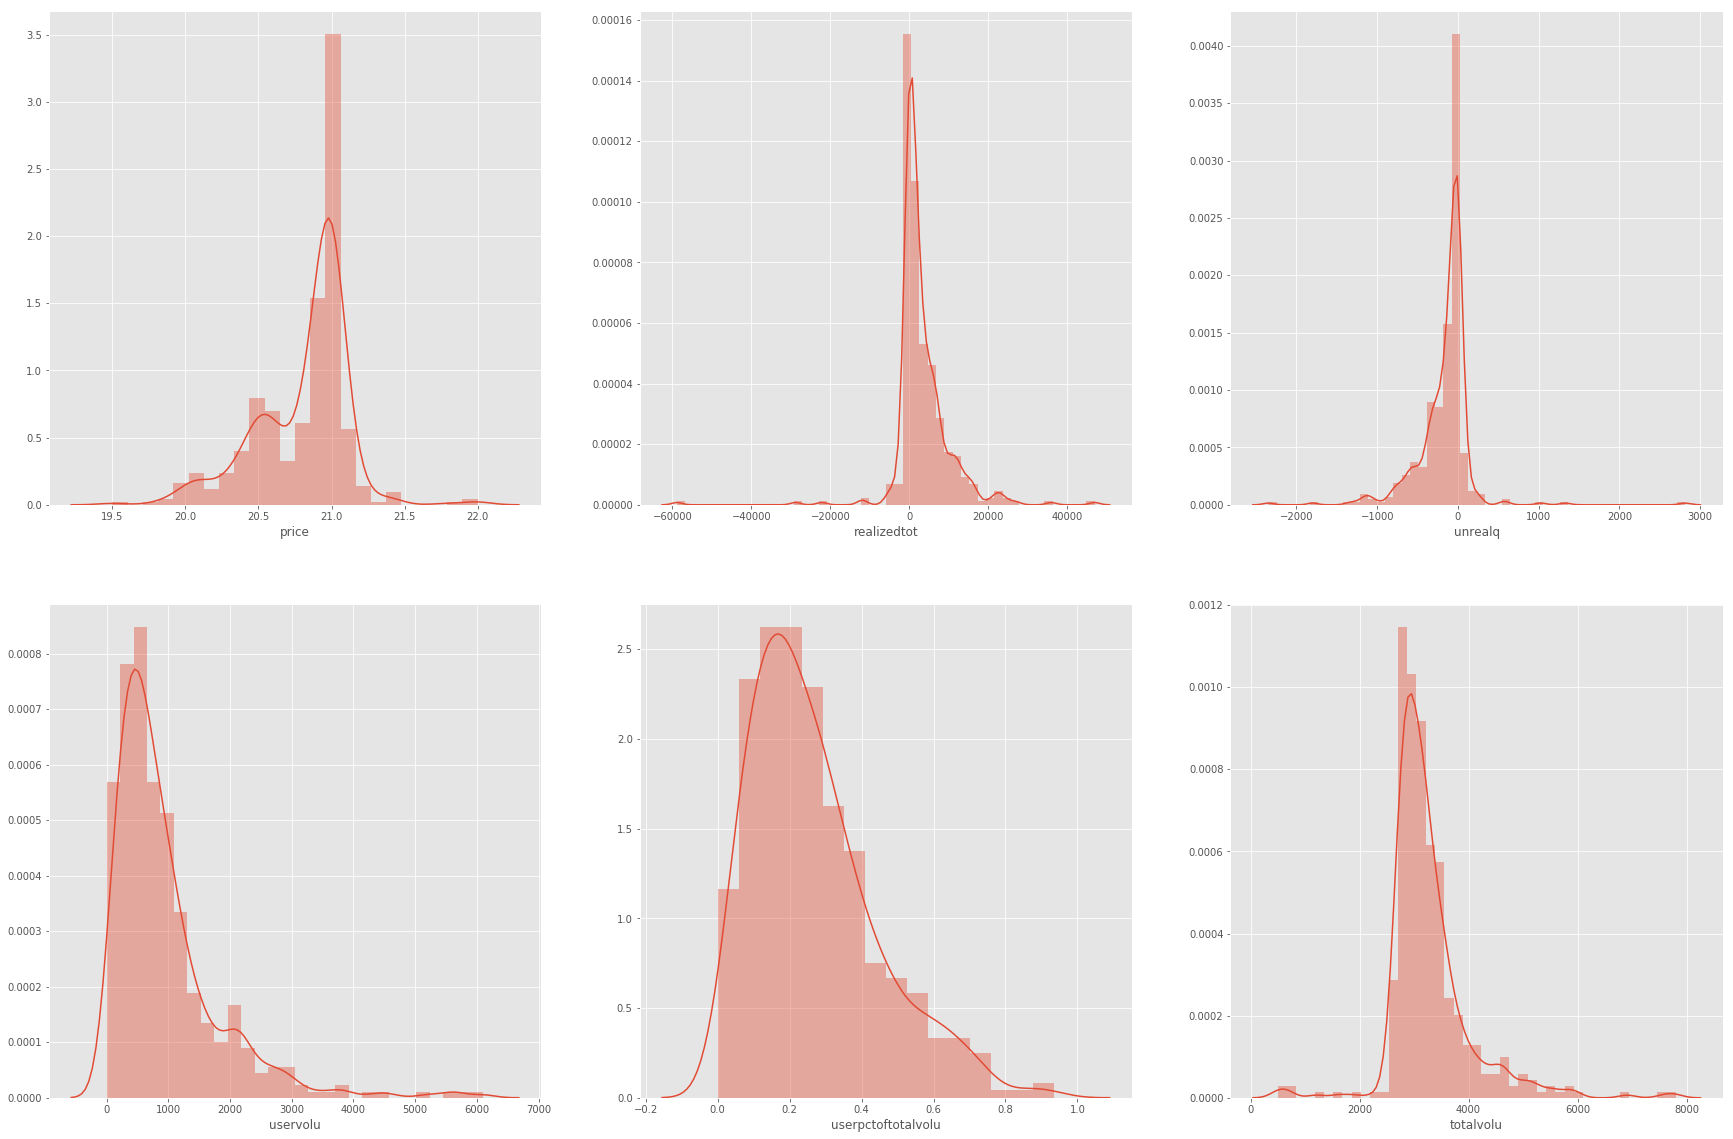

In [618]:
fig = plt.figure(figsize=(30,20))

fig.add_subplot(2,3,1)
sns.distplot(data.price);
#most data centered around 21

fig.add_subplot(2,3,2)
sns.distplot(data.realizedtot);
#mostly centered

fig.add_subplot(2,3,3)
sns.distplot(data.unrealq);
#mostly centered

fig.add_subplot(2,3,4)
sns.distplot(data.uservolu);
#right skew

fig.add_subplot(2,3,5)
sns.distplot(data.userpctoftotalvolu);
#moderate right skew

fig.add_subplot(2,3,6)
sns.distplot(data.totalvolu);
#moderate right skew

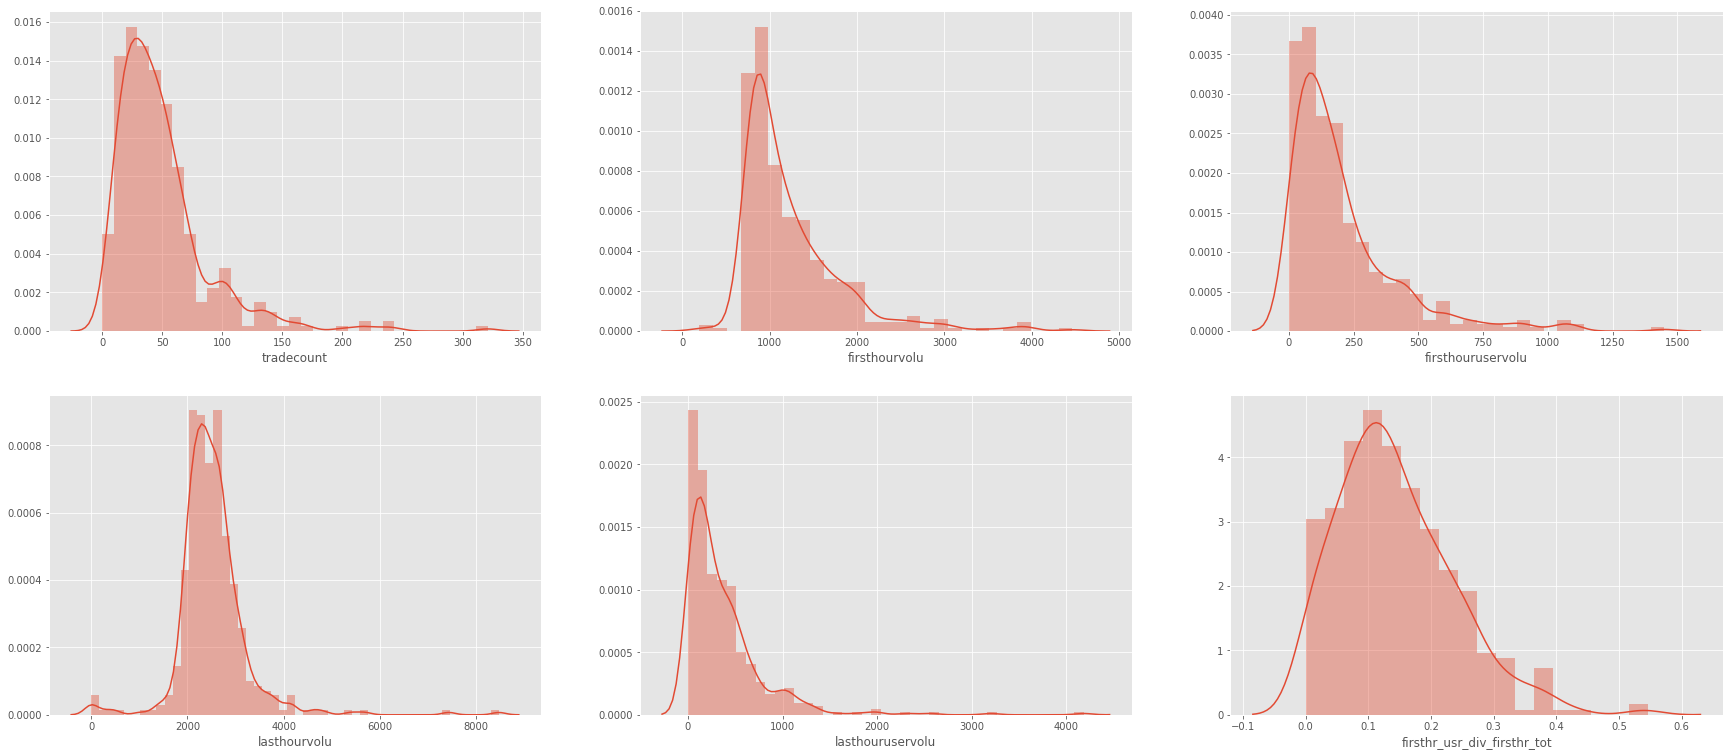

In [619]:
fig = plt.figure(figsize=(30,20))

fig.add_subplot(3,3,1)
sns.distplot(data.tradecount);
#right skew

fig.add_subplot(3,3,2)
sns.distplot(data.firsthourvolu);
#right skew

fig.add_subplot(3,3,3)
sns.distplot(data.firsthouruservolu);
#right skew

fig.add_subplot(3,3,4)
sns.distplot(data.lasthourvolu);
#small right skew

fig.add_subplot(3,3,5)
sns.distplot(data.lasthouruservolu);
#right skew

fig.add_subplot(3,3,6)
sns.distplot(data.firsthr_usr_div_firsthr_tot);
#small right skew



# too many NaN values to run the below code

# fig.add_subplot(3,3,7)
# sns.distplot(data.lasth_usr_div_last_hr_tot);

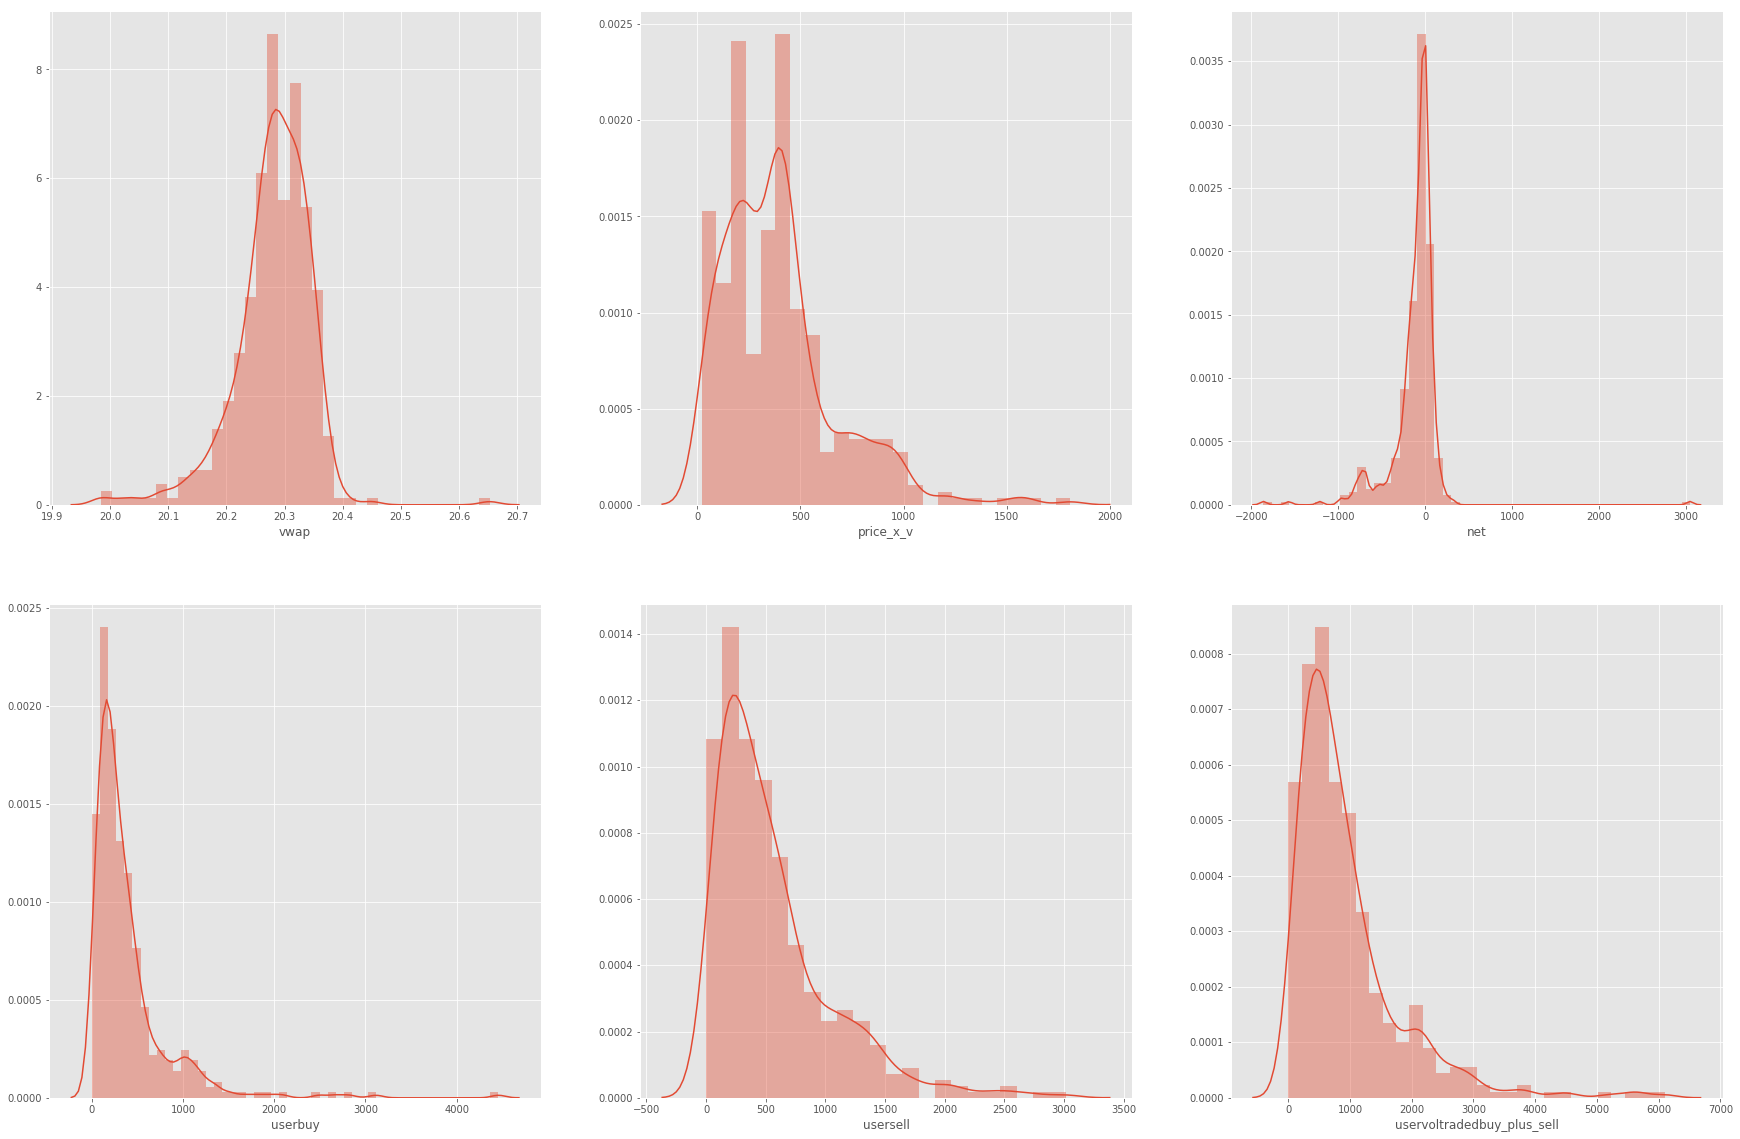

In [620]:
fig = plt.figure(figsize=(30,20))

fig.add_subplot(2,3,1)
sns.distplot(data.vwap);
#data mostly central

fig.add_subplot(2,3,2)
sns.distplot(data.price_x_v);
#small right skew

fig.add_subplot(2,3,3)
sns.distplot(data.net);
#right skewed. majority of data around 0

fig.add_subplot(2,3,4)
sns.distplot(data.userbuy);
#right skew

fig.add_subplot(2,3,5)
sns.distplot(data.usersell);
#right skew

fig.add_subplot(2,3,6)
sns.distplot(data.uservoltradedbuy_plus_sell);
#right skew

## Boxplots

#### Looking at data distribution with added outlier information

##### The intent here was to also look at the data distribution, but moreso to observe the outliers for each variable and the cutoff range where data points beyond that range become outliers

In [621]:
# function to calculate outlier cutoff values

# x is the 25% value
# y is the 75% value

def cutoff(x, y):
    z=y-x
    z=z*1.5
    print(x-z)
    print(y+z)

In [622]:
# used to look at 25% and 75% values for input into cutoff function

# data.describe(include="all")

20.000000000000004
21.599999999999998
-8040.224982000002
13487.175074000002
-677.5
406.5
-838.75
2407.25
-0.19321200000000002
0.682604
1893.25
4471.25


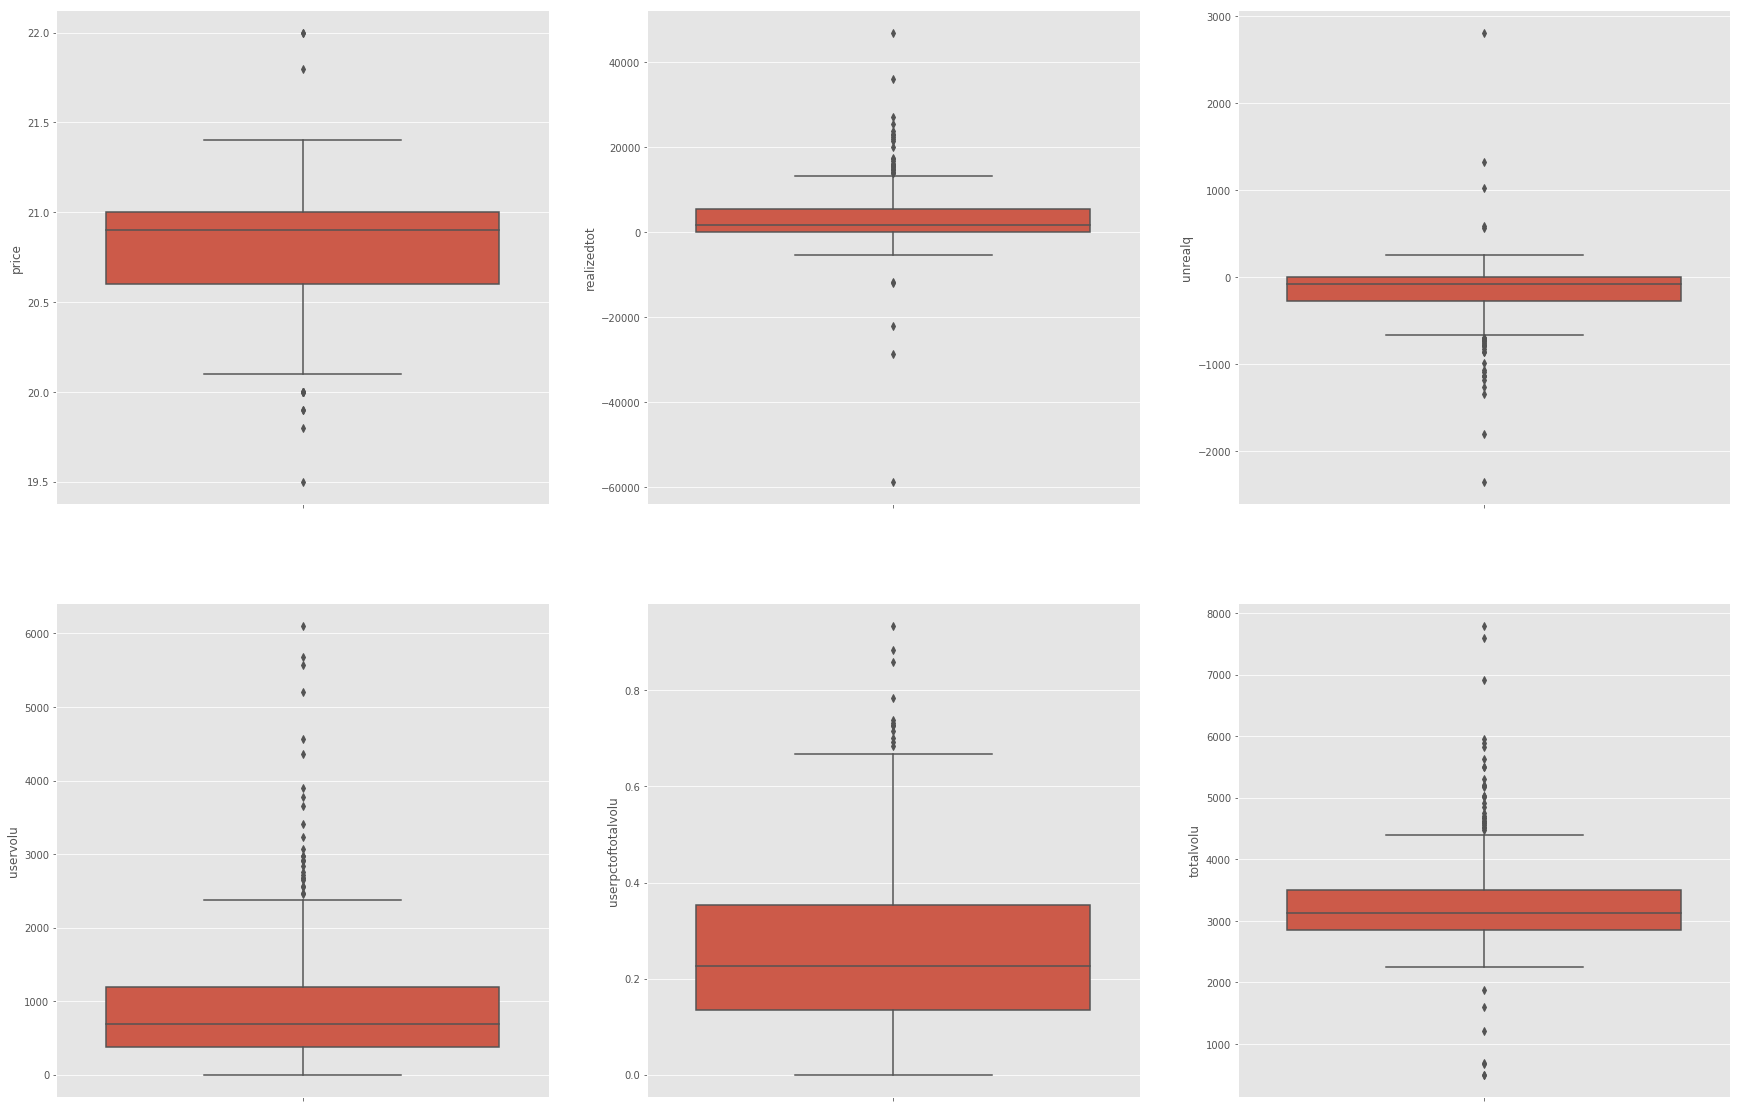

In [623]:
fig = plt.figure(figsize=(30,20))

fig.add_subplot(2,3,1)
sns.boxplot(data.price, orient='v');
cutoff(20.6,21)
# outliers are <20.00 and >21.59

fig.add_subplot(2,3,2)
sns.boxplot(data.realizedtot, orient = 'v');
cutoff(32.550039,5414.400053)
# outliers are <-8040.22 and >13487.17

fig.add_subplot(2,3,3)
sns.boxplot(data.unrealq, orient = 'v');
cutoff(-271,0)
# outliers are <-677.5 and >406.5

fig.add_subplot(2,3,4)
sns.boxplot(data.uservolu, orient = 'v');
cutoff(378.5,1190)
# outliers are <-838.75 and >2407.25

fig.add_subplot(2,3,5)
sns.boxplot(data.userpctoftotalvolu, orient = 'v');
cutoff(.135219,.354173)
# outliers are <-0.19 and >0.68

fig.add_subplot(2,3,6)
sns.boxplot(data.totalvolu, orient = 'v');
cutoff(2860,3504.5);
# outliers are <1893.25 and >4471.25

In [624]:
# manual display of these variables because data.describe(include="all") has omitted them

data['lasthourvolu'].describe(include="all")
data['lasthouruservolu'].describe(include="all")

count     411.000000
mean     2521.304136
std       733.198747
min         0.000000
25%      2166.000000
50%      2432.000000
75%      2752.000000
max      8474.000000
Name: lasthourvolu, dtype: float64

count     411.000000
mean      369.576642
std       433.008935
min         0.000000
25%       102.000000
50%       231.000000
75%       490.000000
max      4182.000000
Name: lasthouruservolu, dtype: float64

-30.75
115.25
-66.5
2345.5
-225.5
562.5
1287.0
3631.0
-480.0
1072.0
-0.1014405
0.3750835
-0.16988299999999998
0.40800499999999995


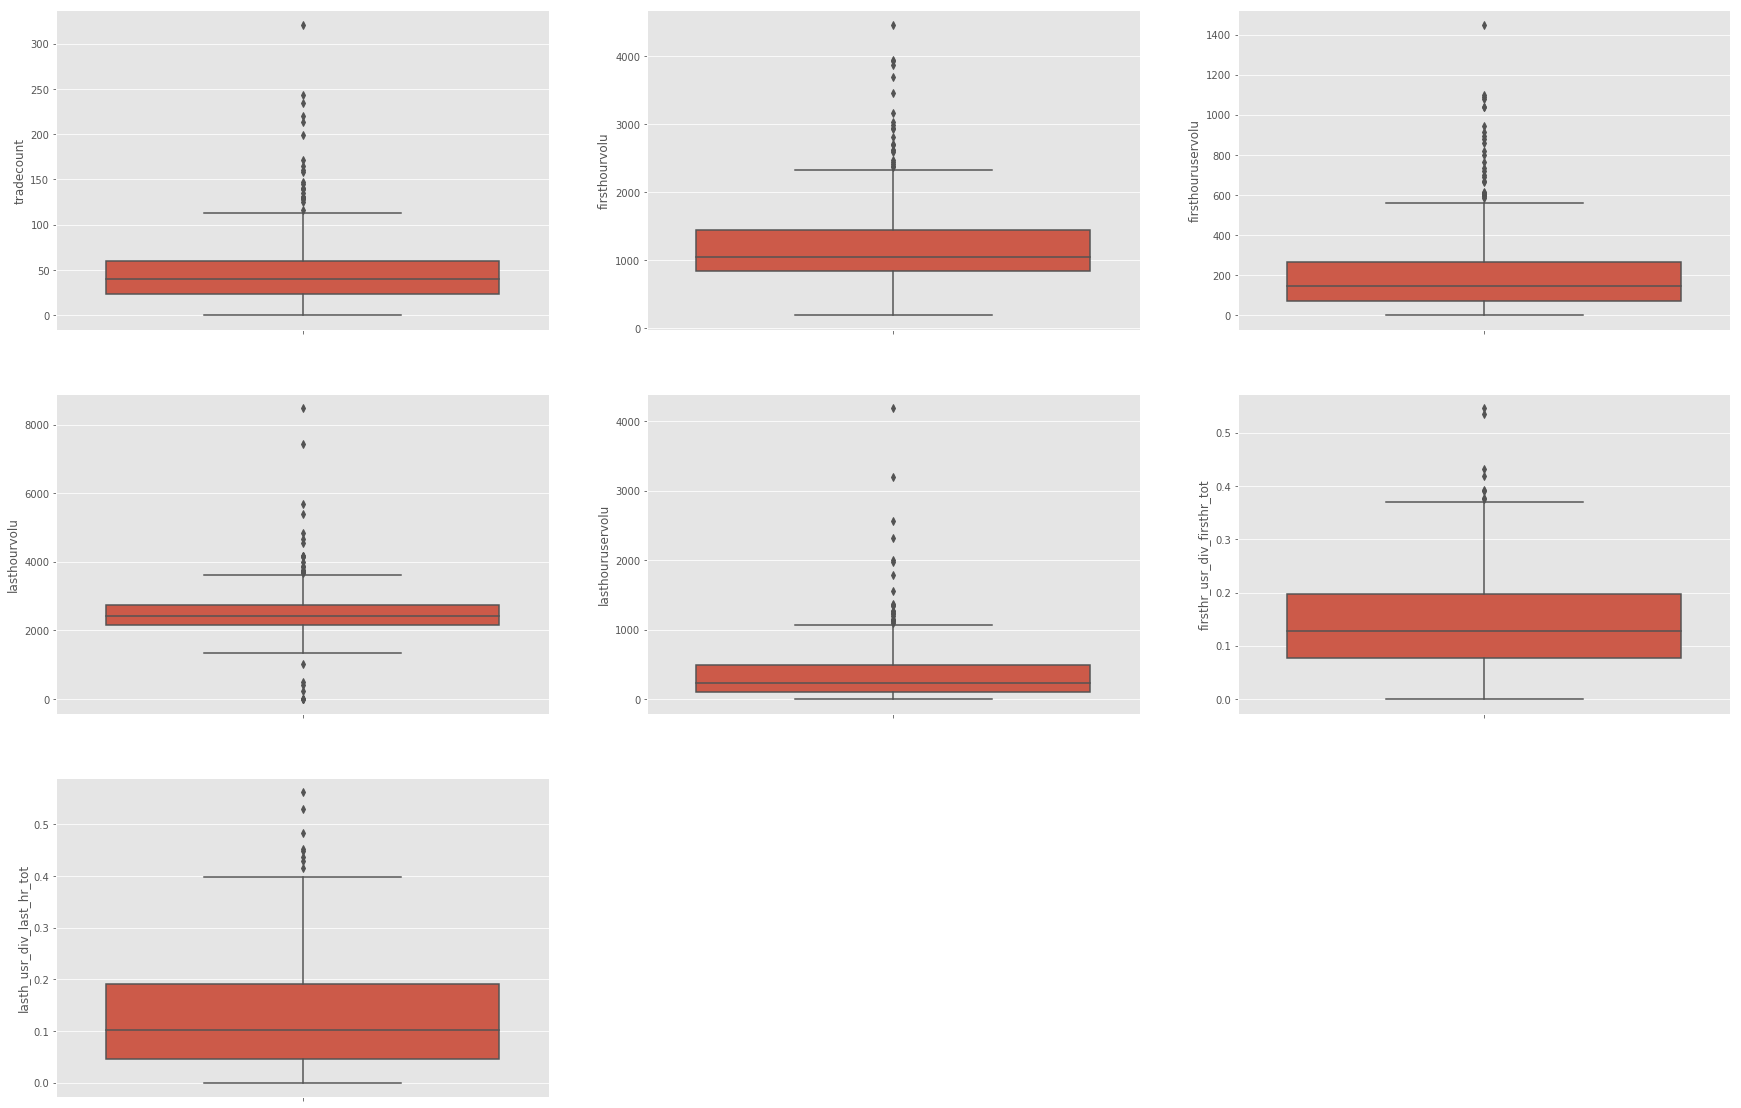

In [625]:
fig = plt.figure(figsize=(30,20))

fig.add_subplot(3,3,1)
sns.boxplot(data.tradecount, orient='v');
cutoff(24,60.5)
# outliers are <-30.75 and >115.25

fig.add_subplot(3,3,2)
sns.boxplot(data.firsthourvolu, orient='v');
cutoff(838,1441)
# outliers are <-66.5 and >2345.5

fig.add_subplot(3,3,3)
sns.boxplot(data.firsthouruservolu, orient='v');
cutoff(70,267)
# outliers are <-225.5 and >562.5

fig.add_subplot(3,3,4)
sns.boxplot(data.lasthourvolu, orient='v');
cutoff(2166,2752)
# outliers are <1287 and >3631

fig.add_subplot(3,3,5)
sns.boxplot(data.lasthouruservolu, orient='v');
cutoff(102,490)
# outliers are <-480 and >1072

fig.add_subplot(3,3,6)
sns.boxplot(data.firsthr_usr_div_firsthr_tot, orient='v');
cutoff(.077256,.196387)
# outliers are <-0.101 and >0.375

fig.add_subplot(3,3,7)
sns.boxplot(data.lasth_usr_div_last_hr_tot, orient='v');
cutoff(.046825,.191297);
# outliers are <-0.1699 and >0.4080

20.144442
20.42961
-199.15000000000003
881.25
-422.97509349999996
262.8252945
-336.25
933.75
-571.75
1514.25
-838.75
2407.25


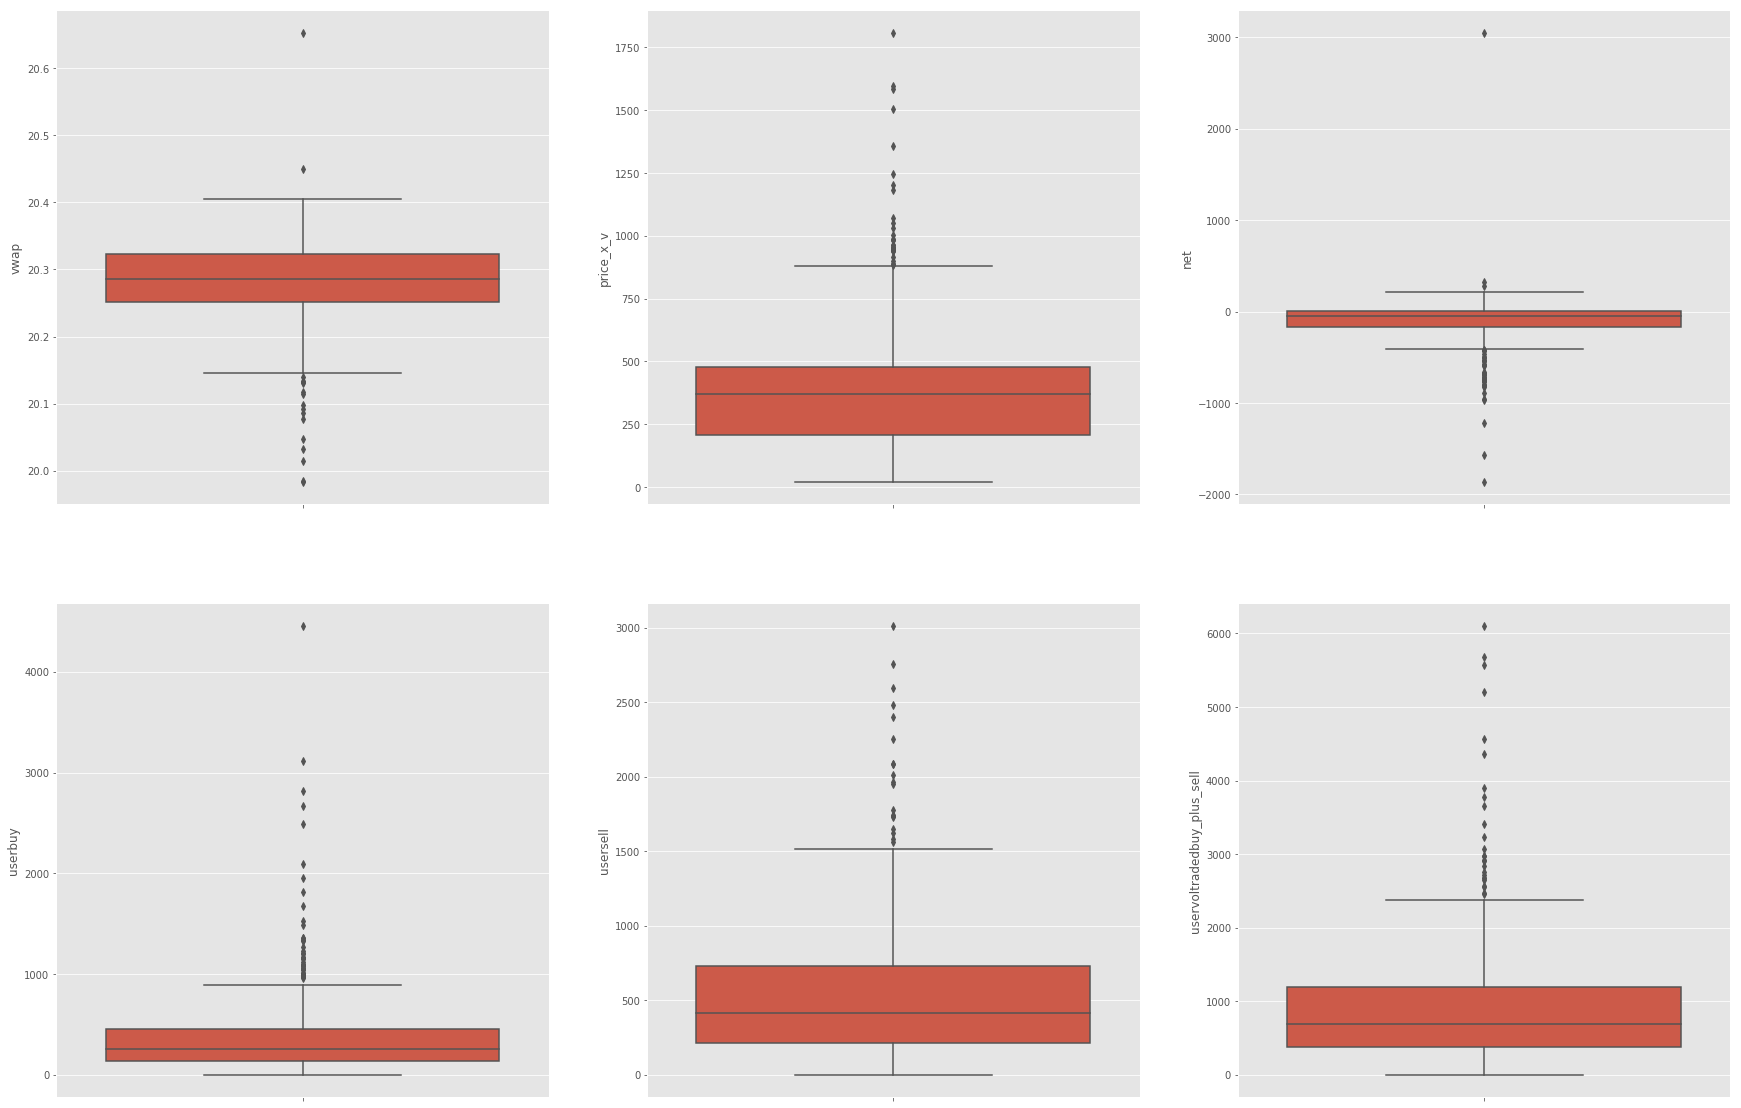

In [626]:
fig = plt.figure(figsize=(30,20))

fig.add_subplot(2,3,1)
sns.boxplot(data.vwap, orient='v');
cutoff(20.25138,20.322672)
# outliers <20.1444 and >20.4296

fig.add_subplot(2,3,2)
sns.boxplot(data.price_x_v, orient='v');
cutoff(206,476.1)
#outliers <-199.15 and >881.25

fig.add_subplot(2,3,3)
sns.boxplot(data.net, orient='v');
cutoff(-165.799948,5.650149)
# outliers <-422.98 and >262.83

fig.add_subplot(2,3,4)
sns.boxplot(data.userbuy, orient='v');
cutoff(140,457.5)
#outliers are <-336.25 and >933.75

fig.add_subplot(2,3,5)
sns.boxplot(data.usersell, orient='v');
cutoff(210.5,732)
# outliers are <-571.75 and >1514.25

fig.add_subplot(2,3,6)
sns.boxplot(data.uservoltradedbuy_plus_sell, orient='v');
cutoff(378.5,1190);
# outliers are <-838.75 and >2407.25

## Scatterplots

C:\Users\Mike\Desktop\Statistical Software\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Mike\Desktop\Statistical Software\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


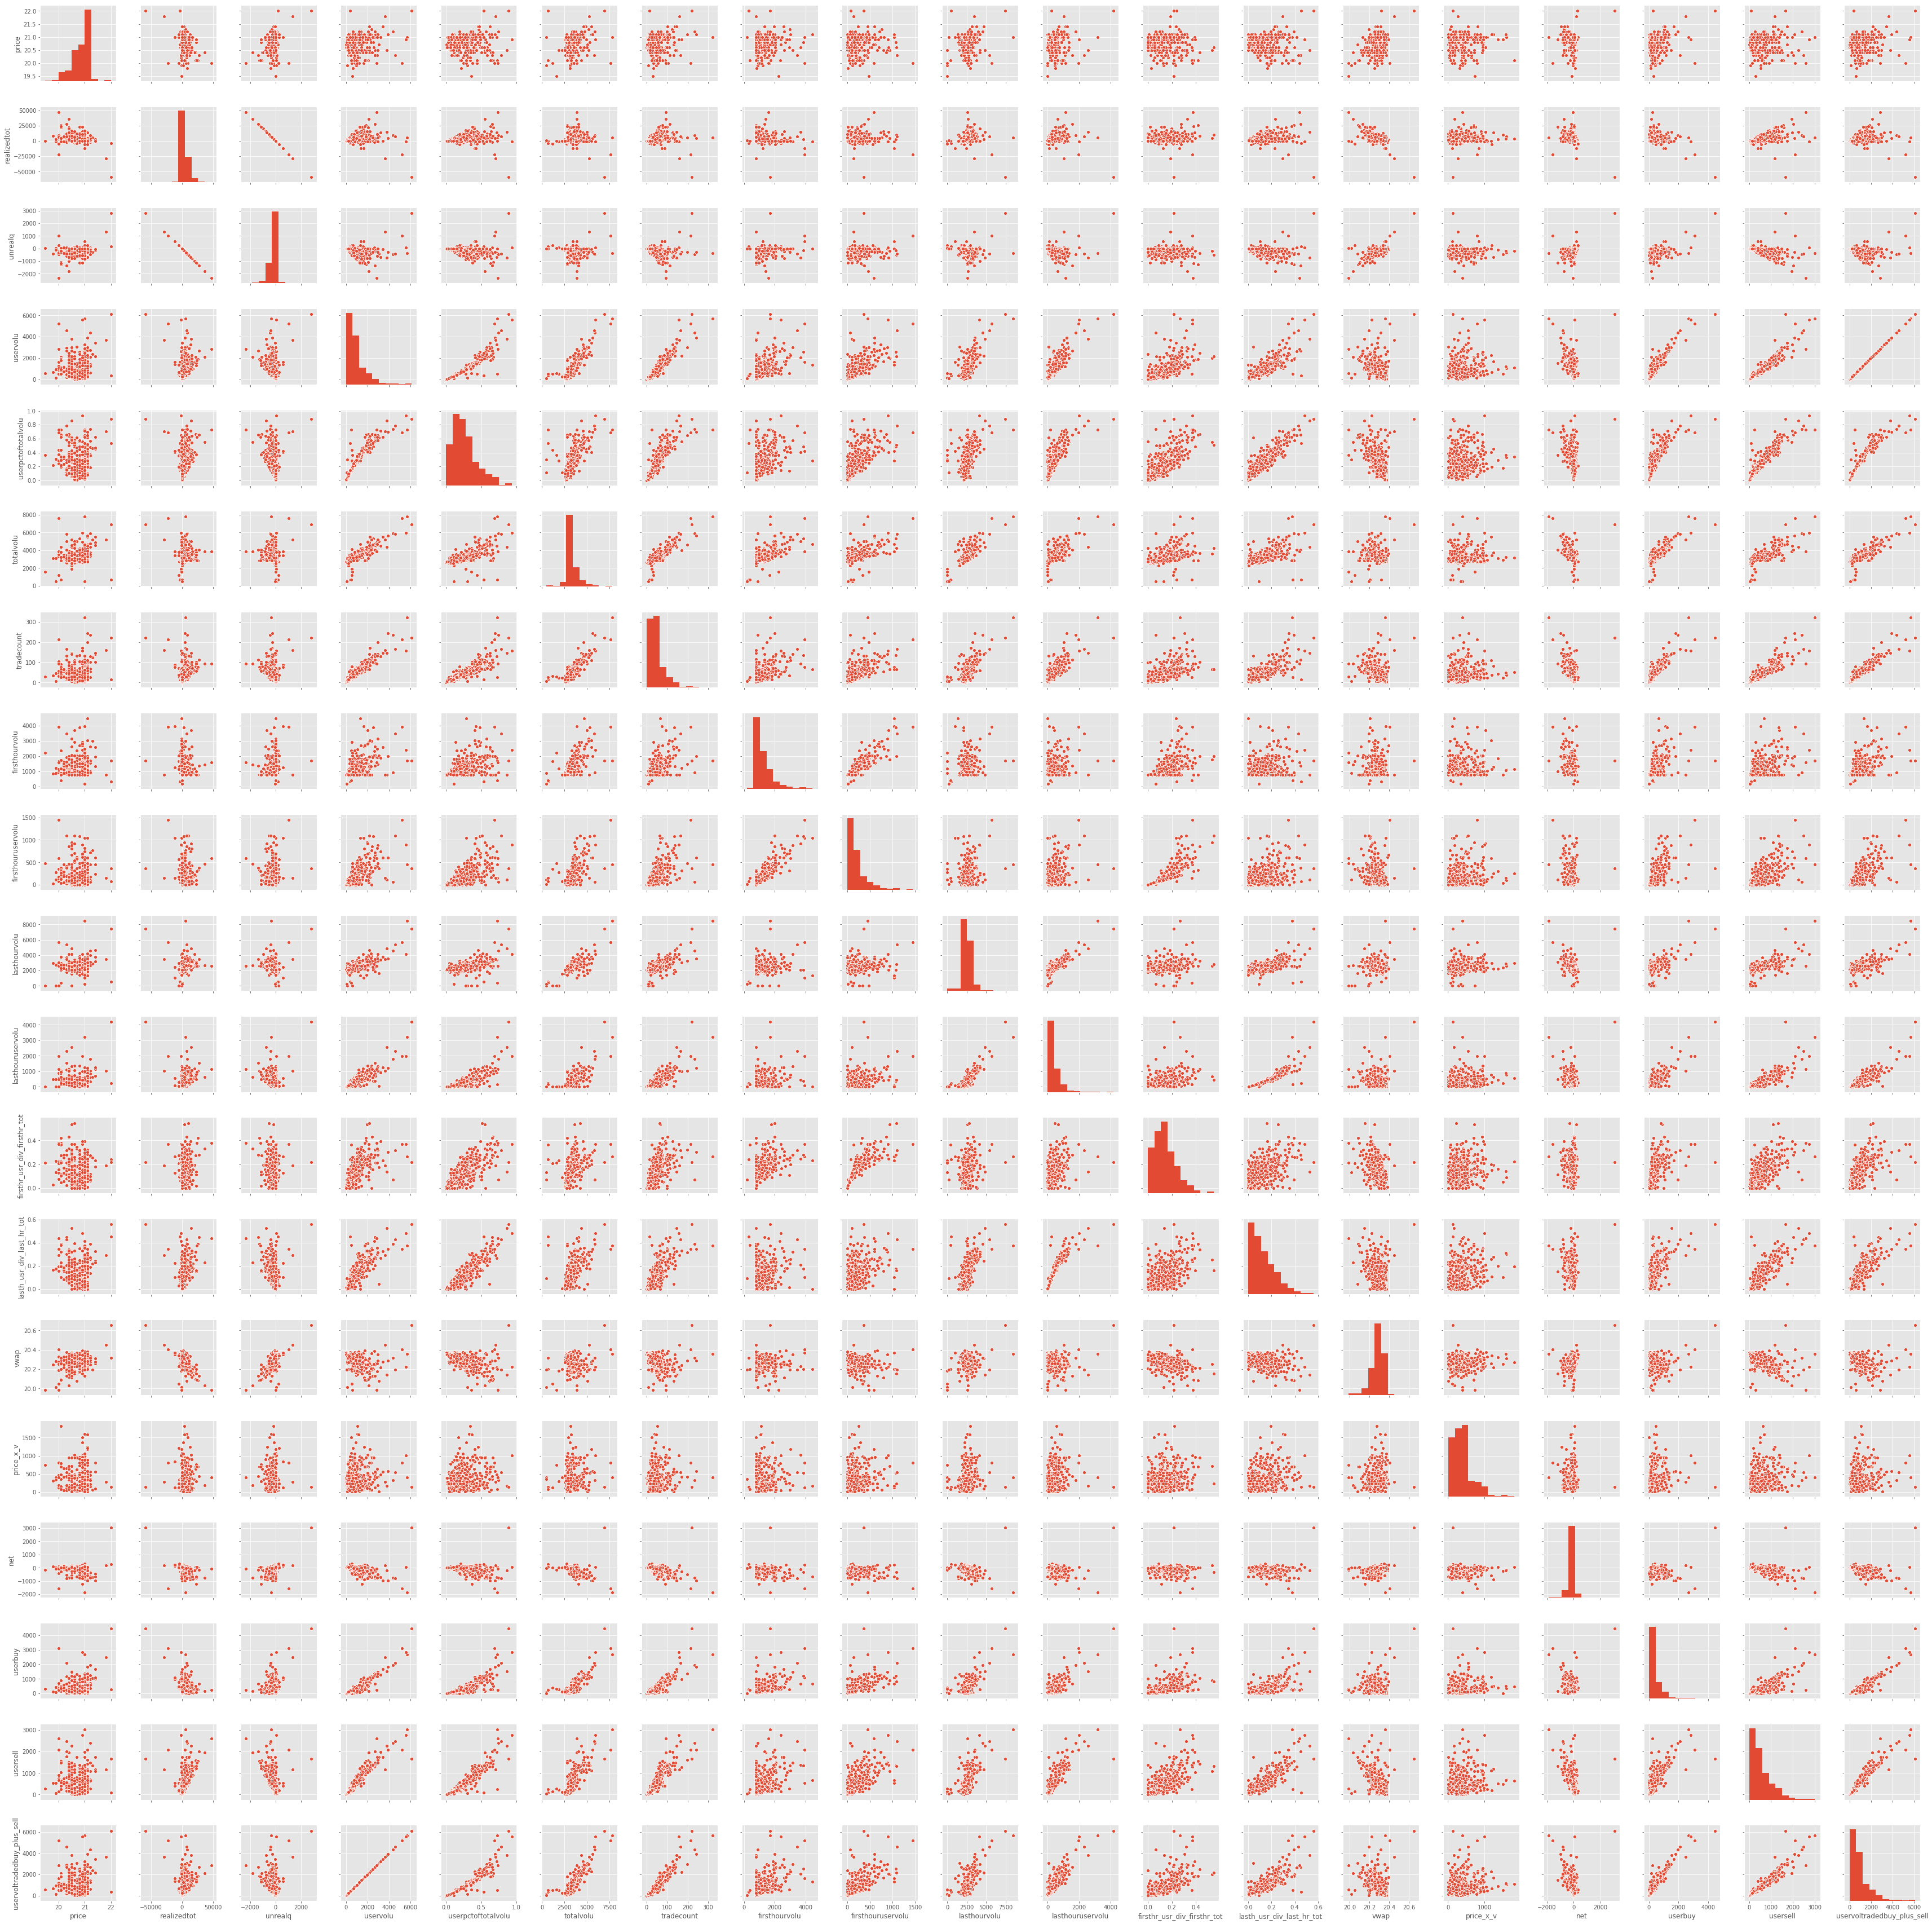

In [627]:
# looking at all scatterplots

sns.pairplot(data);
#sns.pairplot(data, kind="reg");

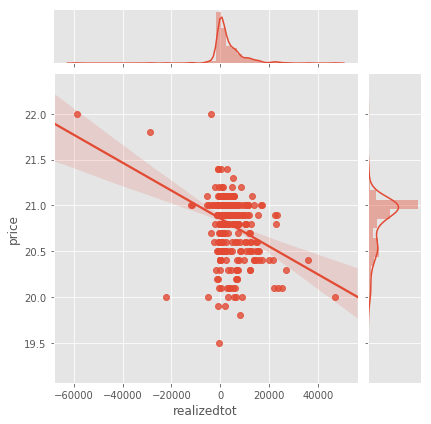

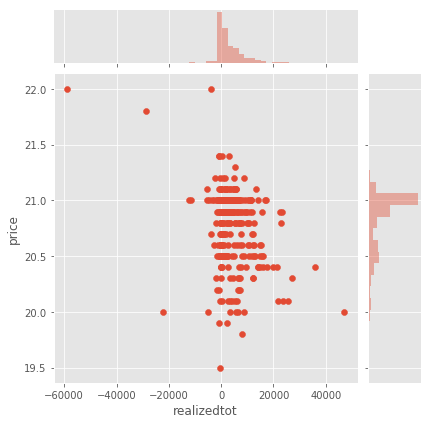

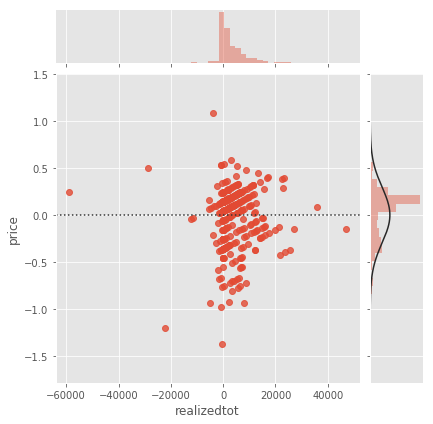

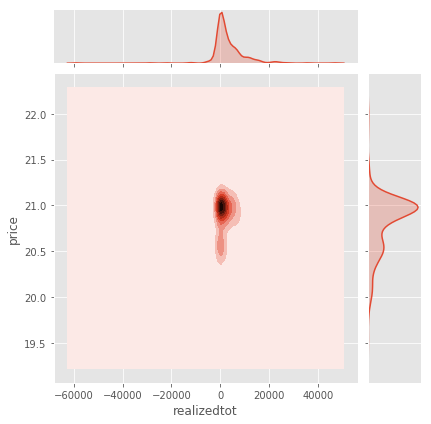

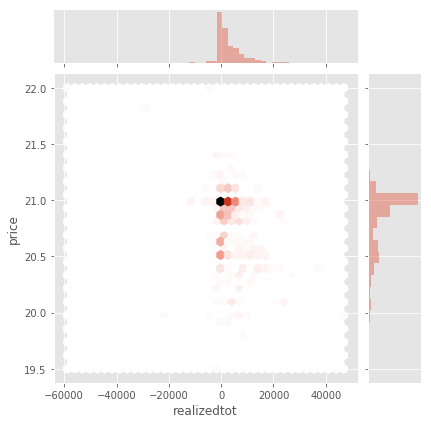

In [628]:
#sns.regplot(data.realizedtot,data.price);

sns.jointplot(data.realizedtot, data.price, kind="reg");
sns.jointplot(data.realizedtot, data.price, kind="scatter");
sns.jointplot(data.realizedtot, data.price, kind="resid");
sns.jointplot(data.realizedtot, data.price, kind="kde");
sns.jointplot(data.realizedtot, data.price, kind="hex");

# most data focused around the center, fluctuating primarily due to price

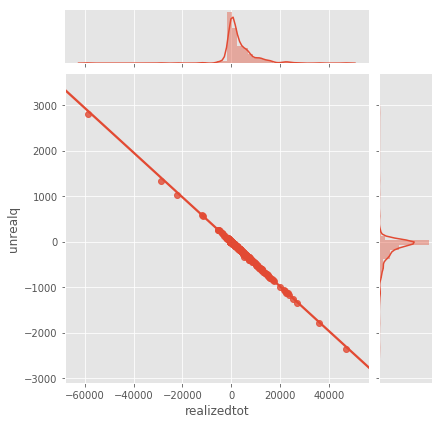

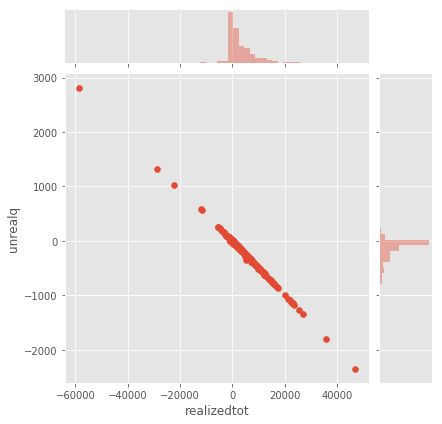

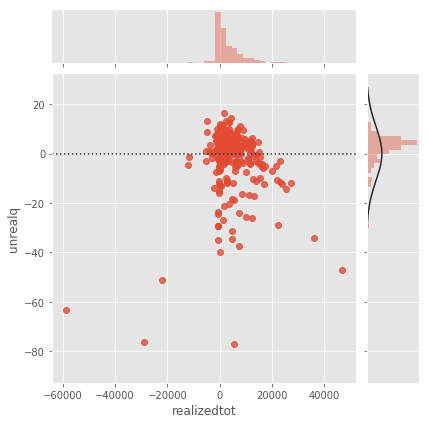

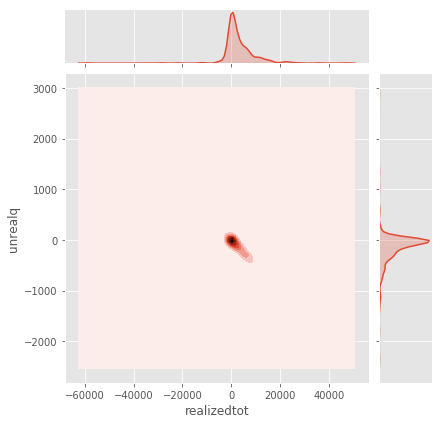

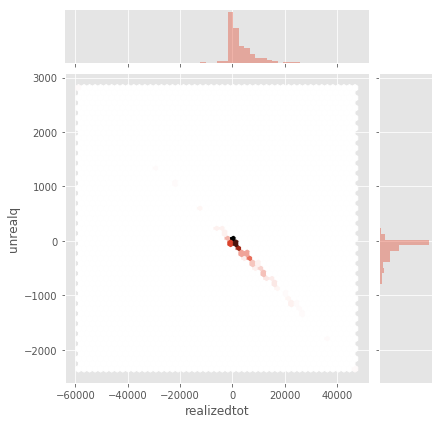

In [629]:
sns.jointplot(data.realizedtot, data.unrealq, kind="reg");
sns.jointplot(data.realizedtot, data.unrealq, kind="scatter");
sns.jointplot(data.realizedtot, data.unrealq, kind="resid");
sns.jointplot(data.realizedtot, data.unrealq, kind="kde");
sns.jointplot(data.realizedtot, data.unrealq, kind="hex");

#very strong negative linear correlation
# identical, or close to it

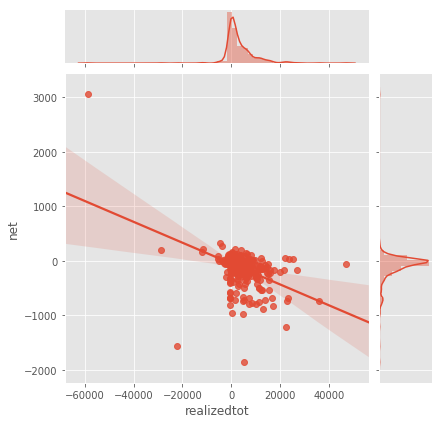

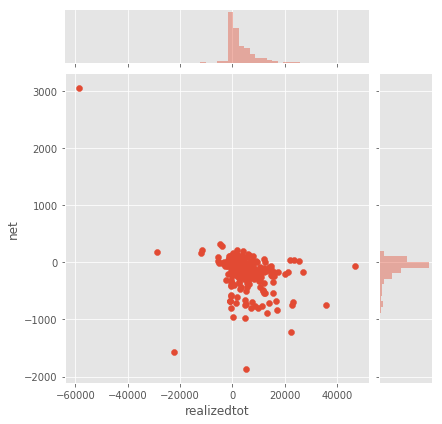

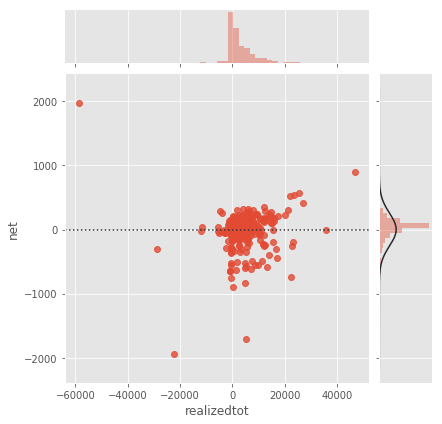

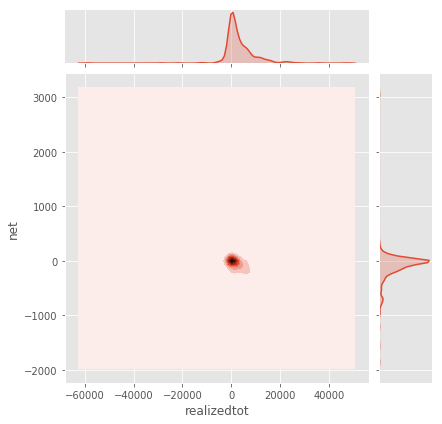

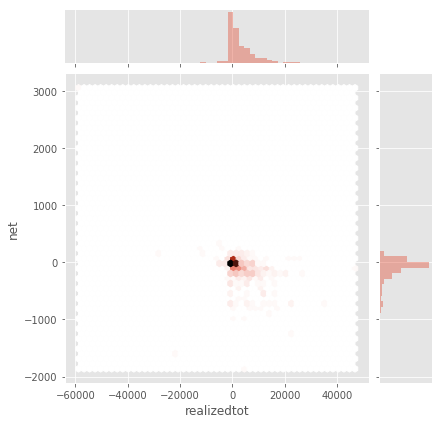

In [630]:
sns.jointplot(data.realizedtot, data.net, kind="reg");
sns.jointplot(data.realizedtot, data.net, kind="scatter");
sns.jointplot(data.realizedtot, data.net, kind="resid");
sns.jointplot(data.realizedtot, data.net, kind="kde");
sns.jointplot(data.realizedtot, data.net, kind="hex");

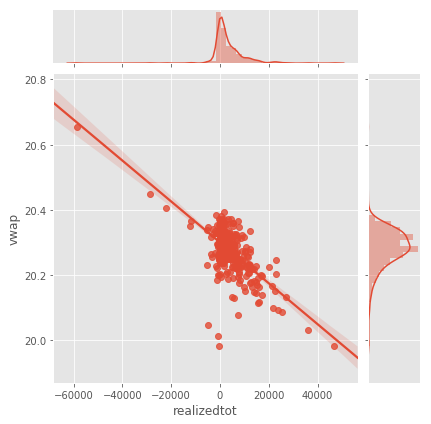

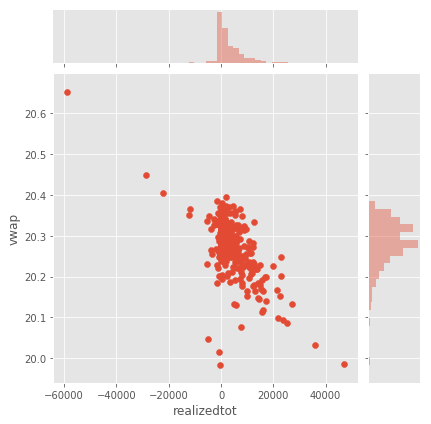

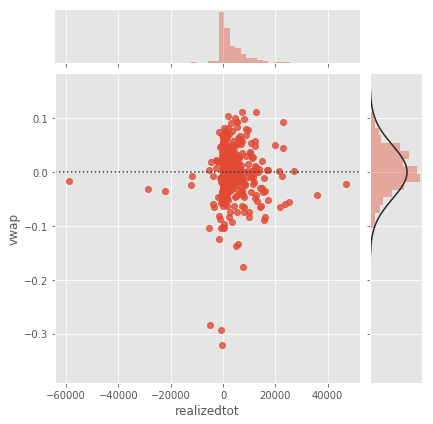

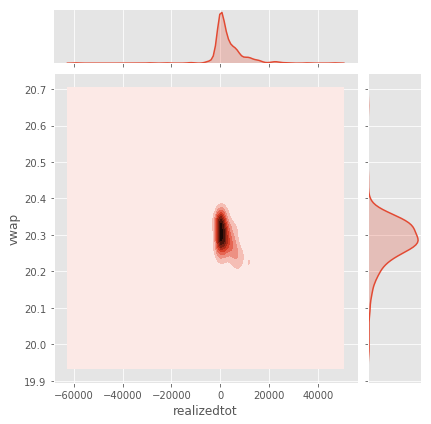

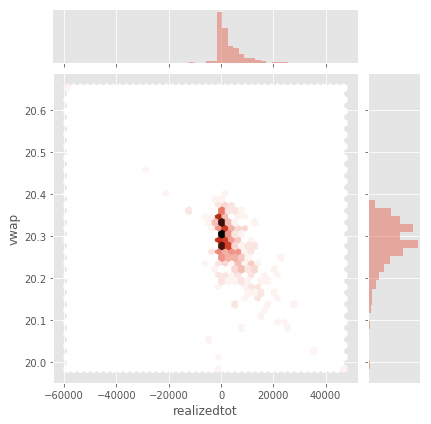

In [631]:
sns.jointplot(data.realizedtot, data.vwap, kind="reg");
sns.jointplot(data.realizedtot, data.vwap, kind="scatter");
sns.jointplot(data.realizedtot, data.vwap, kind="resid");
sns.jointplot(data.realizedtot, data.vwap, kind="kde");
sns.jointplot(data.realizedtot, data.vwap, kind="hex");

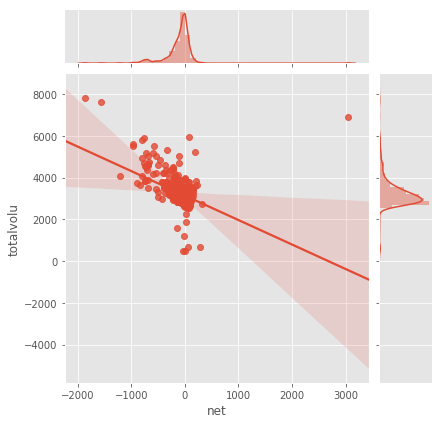

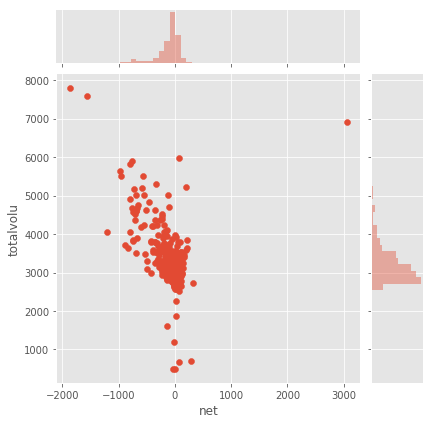

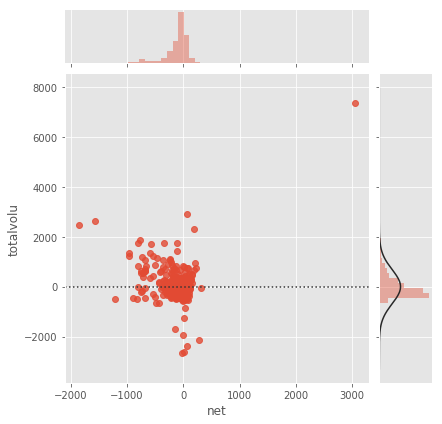

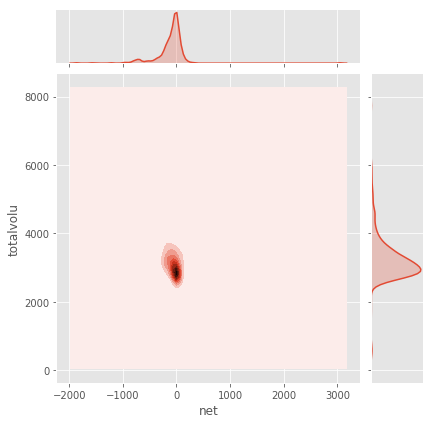

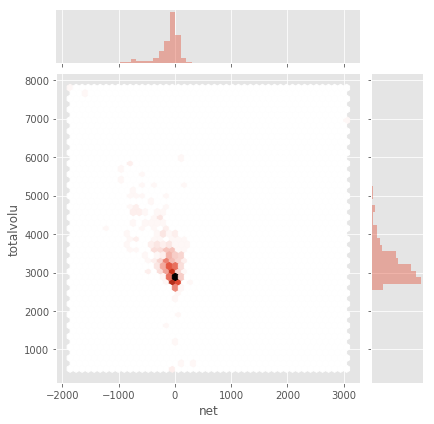

In [632]:
sns.jointplot(data.net, data.totalvolu, kind="reg");
sns.jointplot(data.net, data.totalvolu, kind="scatter");
sns.jointplot(data.net, data.totalvolu, kind="resid");
sns.jointplot(data.net, data.totalvolu, kind="kde");
sns.jointplot(data.net, data.totalvolu, kind="hex");

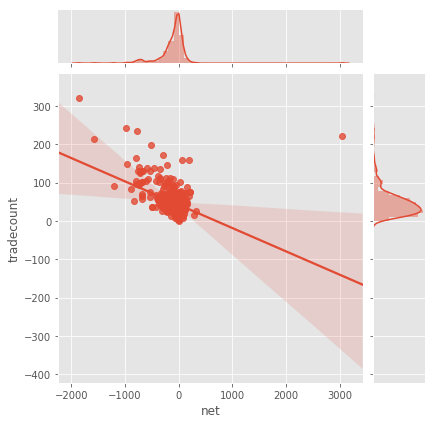

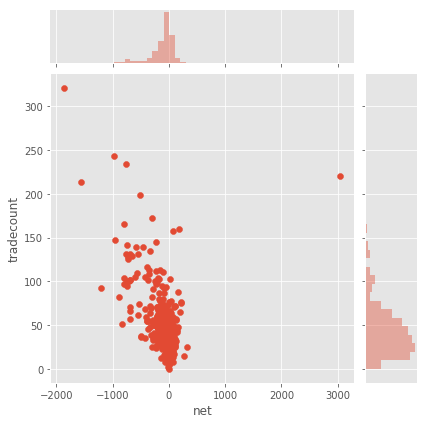

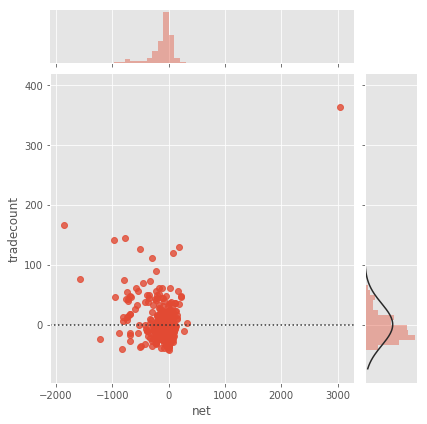

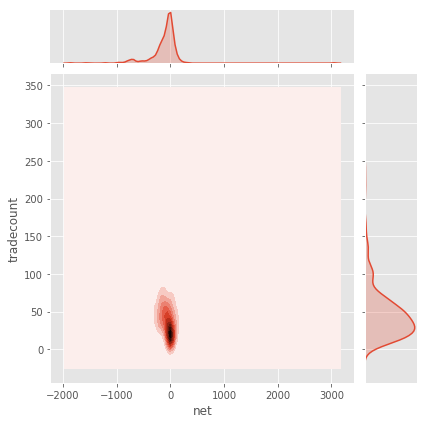

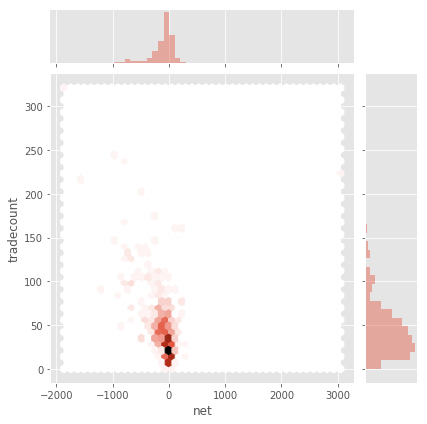

In [633]:
sns.jointplot(data.net, data.tradecount, kind="reg");
sns.jointplot(data.net, data.tradecount, kind="scatter");
sns.jointplot(data.net, data.tradecount, kind="resid");
sns.jointplot(data.net, data.tradecount, kind="kde");
sns.jointplot(data.net, data.tradecount, kind="hex");

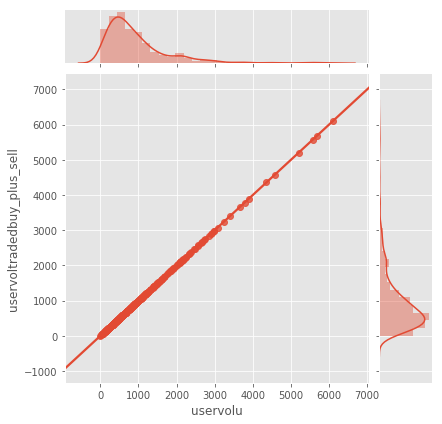

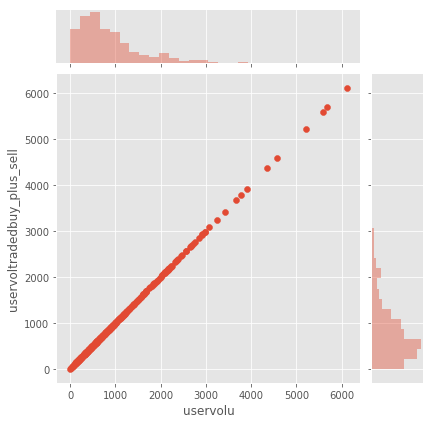

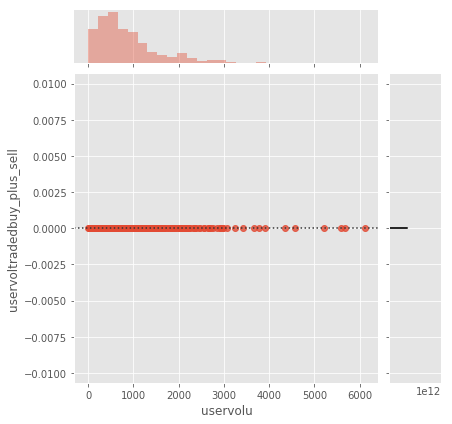

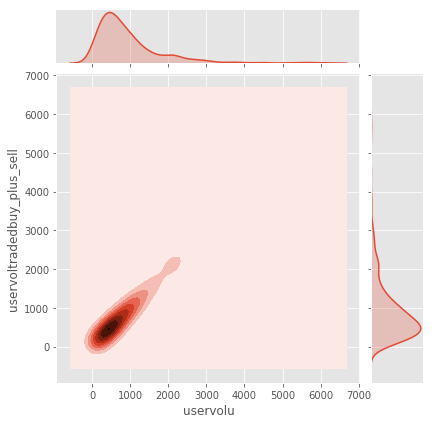

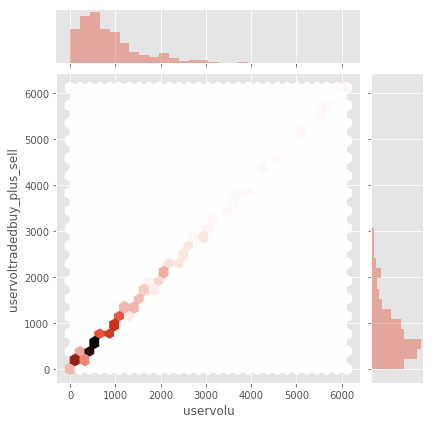

In [634]:
sns.jointplot(data.uservolu, data.uservoltradedbuy_plus_sell, kind="reg");
sns.jointplot(data.uservolu, data.uservoltradedbuy_plus_sell, kind="scatter");
sns.jointplot(data.uservolu, data.uservoltradedbuy_plus_sell, kind="resid");
sns.jointplot(data.uservolu, data.uservoltradedbuy_plus_sell, kind="kde");
sns.jointplot(data.uservolu, data.uservoltradedbuy_plus_sell, kind="hex");

# very strong positive linear correlation
# identical

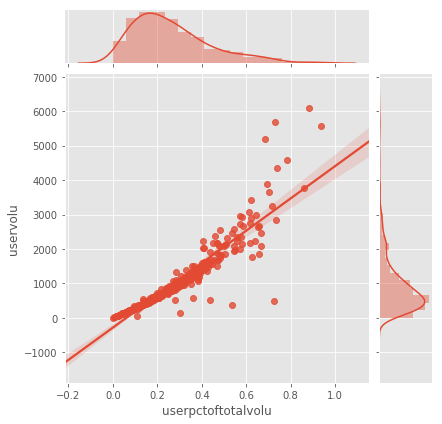

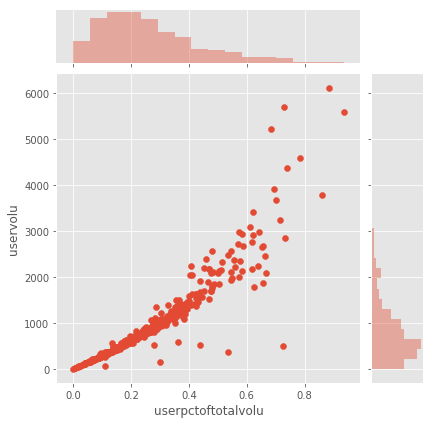

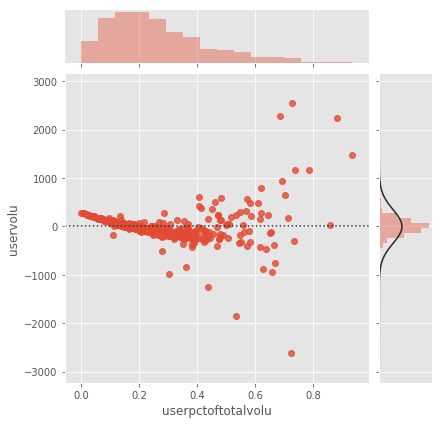

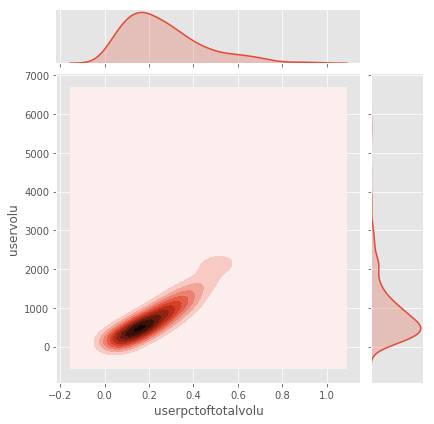

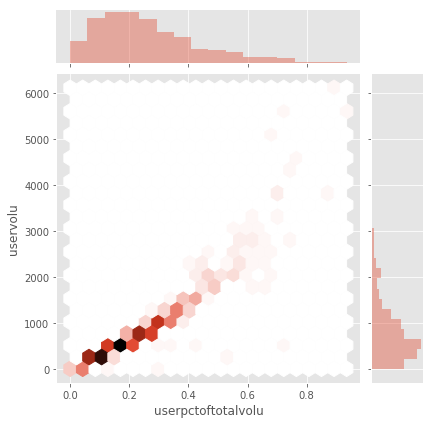

In [645]:
sns.jointplot(data.userpctoftotalvolu, data.uservolu, kind="reg");
sns.jointplot(data.userpctoftotalvolu, data.uservolu, kind="scatter");
sns.jointplot(data.userpctoftotalvolu, data.uservolu, kind="resid");
sns.jointplot(data.userpctoftotalvolu, data.uservolu, kind="kde");
sns.jointplot(data.userpctoftotalvolu, data.uservolu, kind="hex");

# positive linear

## Regressions

In [646]:
from sklearn import linear_model

In [647]:
x = pd.DataFrame(data.price)
y = pd.DataFrame(data.realizedtot)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions[0:5]);

lm.score(x,y)
# R^2 of 0.1129

float(lm.coef_)
float(lm.intercept_)

0.11295903211337577

-7423.9806283347425

157759.00878381316

In [648]:
x = pd.DataFrame(data.unrealq)
y = pd.DataFrame(data.realizedtot)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions[0:5]);

lm.score(x,y)
# 0.9989 R^2 value

float(lm.coef_)
float(lm.intercept_)

0.998933309343536

-20.40086243636293

-83.0768814243911

In [649]:
x = pd.DataFrame(data.net)
y = pd.DataFrame(data.realizedtot)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions[0:5]);

lm.score(x,y)
# R^2 of 0.2119

float(lm.coef_)
float(lm.intercept_)

0.21197437870354785

-11.082564490016416

2006.8366988092243

In [650]:
x = pd.DataFrame(data.vwap)
y = pd.DataFrame(data.realizedtot)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions[0:5]);

lm.score(x,y)
# R^2 of 0.4324

float(lm.coef_)
float(lm.intercept_)

0.43239852422535896

-68988.41616163876

1402372.2661367985

In [651]:
x = pd.DataFrame(data.totalvolu)
y = pd.DataFrame(data.net)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions[0:5]);

lm.score(x,y)
# R^2 of 0.1959

float(lm.coef_)
float(lm.intercept_)

0.19594942530317383

-0.16691255808019034

431.81660015846285

In [652]:
x = pd.DataFrame(data.tradecount)
y = pd.DataFrame(data.net)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions[0:5]);

lm.score(x,y)
# R^2 of 0.1997

float(lm.coef_)
float(lm.intercept_)

0.1997229855707503

-3.285747875415402

46.726042764638805

In [653]:
x = pd.DataFrame(data.uservolu)
y = pd.DataFrame(data.uservoltradedbuy_plus_sell)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions[0:5]);

lm.score(x,y)
# R^2 of 1.0 because they are identical

float(lm.coef_)
float(lm.intercept_)

1.0

1.0

0.0

In [654]:
x = pd.DataFrame(data.uservolu)
y = pd.DataFrame(data.userpctoftotalvolu)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions[0:5]);

lm.score(x,y)
# R^2 of 0.8454

float(lm.coef_)
float(lm.intercept_)

0.8453891838608913

0.00018017505403125967

0.09219482919704922